<a href="https://colab.research.google.com/github/rakshansingh12/disease-risk-prediction-ml/blob/main/03_preprocessing_and_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np

PROJECT_PATH = "/content/drive/MyDrive/disease-risk-prediction-gene-expression"
RAW_DATA_PATH = os.path.join(PROJECT_PATH, "data/raw")

file_path = os.path.join(RAW_DATA_PATH, "GSE5281_expression_matrix.txt.gz")

data = pd.read_csv(
    file_path,
    sep="\t",
    compression="gzip",
    comment="!",
    index_col=0
)

X = data.T


Mounted at /content/drive


In [ ]:
X.shape

(161, 54675)

In [ ]:
X.isnull().sum().sum()

np.int64(0)

check for missing values

In [ ]:
X = X.apply(pd.to_numeric, errors="coerce")

convert to numeric

In [ ]:
X.isnull().sum().sum()

np.int64(0)

In [ ]:
X_log = np.log2(X + 1)

Big numbers get compressed

Small numbers stay relatively distinct

Zero values stay defined (that’s why we add +1)

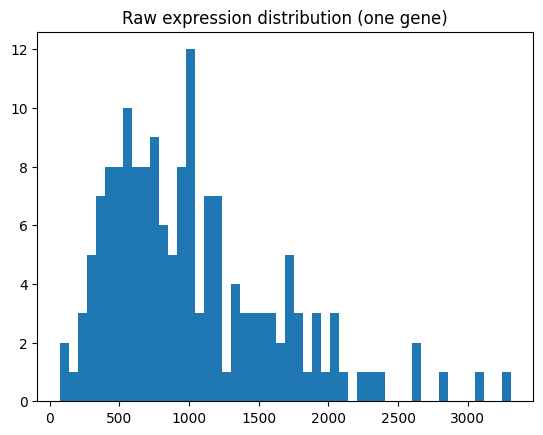

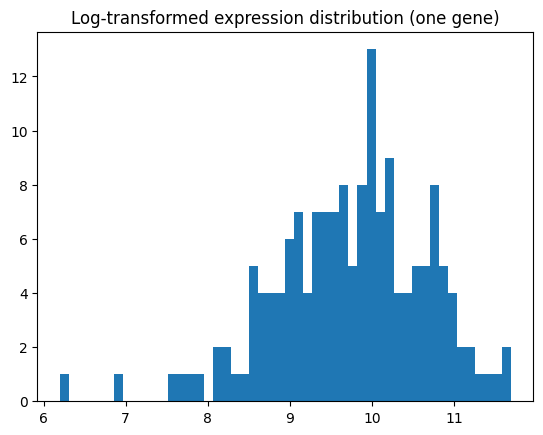

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X.iloc[:, 0], bins=50)
plt.title("Raw expression distribution (one gene)")
plt.show()

plt.hist(X_log.iloc[:, 0], bins=50)
plt.title("Log-transformed expression distribution (one gene)")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

In [ ]:
X_scaled.shape

(161, 54675)

In [ ]:
import numpy as np

processed_path = os.path.join(
    PROJECT_PATH, "data/processed", "X_preprocessed.npy"
)

np.save(processed_path, X_scaled)

In [ ]:
import joblib
import os

PROJECT_PATH = "/content/drive/MyDrive/disease-risk-prediction-gene-expression"

joblib.dump(scaler, os.path.join(PROJECT_PATH, "scaler.pkl"))

['/content/drive/MyDrive/disease-risk-prediction-gene-expression/scaler.pkl']